### Exploratory Analysis of Federal Employment Data

There are two types of files: status files and dynamic files. Status files contain employement status for a given point in time. Dynamic files contain events of employement (hires, transfers, etc).

The dataset for Federal Employement Data is very large. For the exploratory analysis, we decided to subset the data and only analyze years 2007- 2009 for dynamic files and Q1 of 2007 for status files.

In [1]:
%matplotlib inline
from __future__ import print_function, division


import matplotlib.pyplot as plt
import numpy as np
from os.path import expanduser
import pandas as pd
import re
import requests
from datetime import datetime

import os
import glob


In [2]:
OUT_FOLDER = '../Data_csv/'
PATH = '../Data/'

In [3]:
def load_dynamic_file(spath, filetype):
    '''Purpose:  Load a status file into a dataframe'''
    
    '''          - Initially, we will not convert variables to specific types because '''
    '''            we want to see all possible values in the string.'''
    '''Note1:    Position of data elements was obtained from 2015-02-11-opm-foia-response.pdf'''
    
    '''Note2:    Name will not be loaded since it is empty in all instances and we will not use it due to privacy concerns'''

    _id=[]
    _name=[]
    _agency=[]
    _accession=[]
    _effec_dt=[]
    _age=[]
    _pay=[]
    _grade=[]
    _los=[]
    _duty=[]
    _occup=[]
    _occup_cat=[]
    _adj_pay=[]
    _typ_app=[]
    _work_sche=[]
    _file_type=[]

    f = open(spath, 'r')

    for line in f:
    
        _id.append (line[0:9])
        _name.append (line[9:32])
        _agency.append (line[32:36])
        _accession.append (line[36:38])
        _effec_dt.append (datetime.strptime(line[38:46], '%Y%m%d'))
        _age.append (line[46:52])
        _pay.append (line[52:54])
        _grade.append (line[54:56])
        _los.append (line[56:62])
        _duty.append (line[62:71])
        _occup.append (line[71:75])
        _occup_cat.append (line[75:76])
        _adj_pay.append (line[76:82])
        _typ_app.append (line[82:84])
        _work_sche.append (line[84:85])
        _file_type.append (filetype)

    f.close()  
    
    df = pd.DataFrame({'empid': _id, 'agency': _agency, 'accession_ind': _accession, 'effective_dt': _effec_dt,
                       'age': _age, 'pay_plan': _pay, 'grade': _grade, 'los': _los, 'duty_station': _duty, 'occupation': _occup ,
                        'occupation_cat':_occup_cat, 'adjusted_pay':_adj_pay, 'type_appointment': _typ_app, 
                        'work_schedule': _work_sche, 'file_type':_file_type })
    
    return df

In [11]:

#Load all dynamic files into one dataset

'''*********************************************************************************************'''
''' NOTE: Make sure that you only have 3 years of data otherwise the dataframe will be too large'''
'''*********************************************************************************************'''

first_file=1

    
'''Start with employees of the Deparment of Defense'''
for infile in glob.glob( os.path.join(PATH, '*.DOD.*') ):
    print ("current file is: " + infile)
    df=load_dynamic_file(infile, 'DYN_DOD')
    fname=infile[8:(len(infile)-4)]
    df.to_csv('../Output-data/' + fname + '.csv')

    
'''Continue with employees outside of DOD'''    

for infile in glob.glob( os.path.join(PATH, '*.NONDOD.*') ):
    print ("current file is: " + infile)
    df=load_dynamic_file(infile, 'DYN_NDOD')
    fname=infile[8:(len(infile)-4)]
    df.to_csv('../Output-data/' + fname + '.csv')


current file is: ../Data\DEC2007.DOD.FO05M4.TXT
current file is: ../Data\DEC2008.DOD.FO05M4.TXT
current file is: ../Data\DEC2009.DOD.FO05M4.TXT


KeyboardInterrupt: 

In [5]:
s='../Data\DEC2007.DOD.FO05M4.TXT'

In [7]:
s[8:(len(s)-4)]

'DEC2007.DOD.FO05M4'

In [7]:


def create_stats_categorical_dataframe(df):
    for varname in df.columns:
        create_stats_categorical(df,varname)
    df_stats = pd.DataFrame({'var_name': var_name,  'n_unique': n_unique, 'pct_unique': pct_unique, 
                         'n_miss': n_miss, 'max_val': max_val, 'min_val': min_val}) 
    
    return df_stats


### Process Dynamic Files

Dynamic files are relatively small. We will combine all files for the three years to create one dataframe and one csv file that can be used for further analysis.

- Initially, we will not convert variables to specific types because we want to see all possible values in the string.

In [10]:
# Save dataframe to csv file

dyn_files.to_csv('../Output-data/dyn_files_2007_2009.csv')

In [11]:
dyn_files.describe()

,accession_ind,adjusted_pay,age,agency,duty_station,effective_dt,empid,file_type,grade,los,occupation,occupation_cat,pay_plan,type_appointment,work_schedule
count,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339,1603339
unique,17,80557,14,556,11000,1557,1128829,2,159,11,733,7,191,17,9
top,AD,027504,20-24,VATA,#########,2007-04-29 00:00:00,001836554,DYN_NDOD,05,UNSP,0303,T,GS,10,F
freq,499919,30060,234896,198500,805915,16813,16,1020127,208780,628293,117094,369403,972954,295346,1259667
first,NaN,NaN,NaN,NaN,NaN,2005-04-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2009-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Process Status Files

- Initially, we will not convert variables to specific types because we want to see all possible values in the string.


In [12]:
def load_status_file(spath, filetype):
    '''Purpose:  Load a status file into a dataframe'''
    '''          - Initially, we will not convert variables to specific types because '''
    '''            we want to see all possible values in the string.'''
    '''Note1:    Position of data elements was obtained from 2015-02-11-opm-foia-response.pdf'''
    
    '''Note2:    Name will not be loaded since it is empty in all instances and we will not use it due to privacy concerns'''
    
    _id = []  
    _file_dt = []
    _agency = []
    _accession = []
    _effec_dt = []
    _age = []
    _years_edu = []
    _educ = []
    _pay = []
    _grade = []
    _los = []
    _duty = []
    _occup = []
    _occup_cat = []
    _adj_pay = []
    _typ_app = []
    _work_sche = []
    _nsftp_ind = []
    _file_type = []
    _sup_status = []
    
    

    f = open(spath, 'r')

    for line in f:
        _id.append (line[0:9])
        #_name.append (line[9:32])
        _file_dt.append (datetime.strptime(line[32:40], '%Y%m%d'))
        _agency.append (line[40:44])
        _duty.append (line[44:53])
        _age.append (line[53:59]) 
        _educ.append (line[59:61])
        _pay.append (line[61:63])
        _grade.append (line[63:65])
        _los.append (line[65:71])
        _occup.append (line[71:75])
        _occup_cat.append (line[75:76])
        _adj_pay.append (line[76:82])   
        _sup_status.append (line[82:83])
        _typ_app.append (line[83:85])
        _work_sche.append (line[85:86])
        _nsftp_ind.append (line[86:87])
        _file_type.append (filetype)
        
    f.close()  
    
    df = pd.DataFrame({'empid': _id,  'file_dt': _file_dt, 'agency': _agency, 'duty_station': _duty, 
                       'age': _age, 'educ_level': _educ, 'pay_plan': _pay, 'grade': _grade, 
                       'los': _los, 'occupation': _occup ,'occupation_cat':_occup_cat, 'adjusted_pay':_adj_pay, 
                       'superv_status': _sup_status, 'type_appointment': _typ_app, 'work_schedule': _work_sche, 
                       'nsftp_ind': _nsftp_ind, 'file_type':_file_type })
    
    return df

Status files are very large, we will only use one quarter (Q1 -2007).

+ Include both DOD employees and non-DOD employees

In [13]:
first_file=1

for infile in glob.glob( os.path.join(PATH, 'Status_*2007_03*') ):
    print ("current file is: " + infile)
    
    if infile[15:18]=='DoD':
        df=load_status_file(infile, 'STA_DOD')
    else:
        df=load_status_file(infile, 'STA_NDOD')
        
    if first_file==1:
        dfstat_2007_03 = pd.DataFrame(data=df)
        first_file=0
    else:
        dfstat_2007_03=dfstat_2007_03.append(df) 
        
        

del df        


current file is: ../Data\Status_DoD_2007_03.txt
current file is: ../Data\Status_Non_DoD_2007_03.txt


In [14]:
dfstat_2007_03.to_csv('../Output-data/stat_2007_03.csv')

In [15]:
dfstat_2007_03.describe()

,adjusted_pay,age,agency,duty_station,educ_level,empid,file_dt,file_type,grade,los,nsftp_ind,occupation,occupation_cat,pay_plan,superv_status,type_appointment,work_schedule
count,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970,1844970
unique,88590,14,529,11828,24,1842387,1,2,154,11,2,752,7,184,7,17,9
top,028862,50-54,VATA,#########,04,004101442,2007-03-31 00:00:00,STA_NDOD,12,5-9,1,0301,A,GS,8,10,F
freq,12410,323634,220064,1018462,522695,4,1844970,1182424,212160,292531,1600145,81427,636718,1198573,1576128,1122683,1679241
first,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2007-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
var_name=[]
n_unique=[]
pct_unique=[]
n_miss=[]
prnt_tbl_cnts=[]
max_val=[]
min_val=[]

df_stats_categorical=create_stats_categorical_dataframe(dfstat_2007_03)

In [17]:
df_stats_categorical

,max_val,min_val,n_miss,n_unique,pct_unique,var_name
0,699145,******,0,88590,4.801704,adjusted_pay
1,UNSP,15-19,0,14,0.000759,age
2,ZS00,AB00,0,529,0.028673,agency
3,ZI8000000,#########,0,11828,0.641094,duty_station
4,22,,0,24,0.001301,educ_level
5,010999648,000000002,0,1842387,99.859998,empid
6,2007-03-31 00:00:00,2007-03-31 00:00:00,0,1,0.000054,file_dt
7,STA_NDOD,STA_DOD,0,2,0.000108,file_type
8,SM,,0,154,0.008347,grade
9,UNSP,1-2,0,11,0.000596,los


## Descriptive Statistics 

## Status File - Quarter 1, 2007

### Overview

In [18]:
print_overview(dfstat_2007_03)

Dataset general info 

Number of variables              17        
Number of observations           1844970   


### Categorical Variables

In [19]:
df_stats_categorical

,max_val,min_val,n_miss,n_unique,pct_unique,var_name
0,699145,******,0,88590,4.801704,adjusted_pay
1,UNSP,15-19,0,14,0.000759,age
2,ZS00,AB00,0,529,0.028673,agency
3,ZI8000000,#########,0,11828,0.641094,duty_station
4,22,,0,24,0.001301,educ_level
5,010999648,000000002,0,1842387,99.859998,empid
6,2007-03-31 00:00:00,2007-03-31 00:00:00,0,1,0.000054,file_dt
7,STA_NDOD,STA_DOD,0,2,0.000108,file_type
8,SM,,0,154,0.008347,grade
9,UNSP,1-2,0,11,0.000596,los


### Frequency Tables for Categorical Variables

In [20]:
for i in range(0, len(var_name)):
    
    print (var_name[i])
    
    print_pretty_cnts(prnt_tbl_cnts[i][0],prnt_tbl_cnts[i][1] )
    print ('\n')

adjusted_pay
028862     |  12410     
058203     |  12005     
052912     |  11417     
082446     |  11336     
025797     |  11179     
...        |  ...       
064117     |  1         
064116     |  1         
064115     |  1         
064114     |  1         
127731     |  1         


age
50-54      |  323634    
45-49      |  309696    
55-59      |  259985    
40-44      |  258071    
35-39      |  192690    
30-34      |  142588    
60-64      |  127992    
25-29      |  112042    
20-24      |  53215     
65-69      |  39040     
70-74      |  11409     
15-19      |  9374      
75+        |  4933      
UNSP       |  301       


agency
VATA       |  220064    
TR93       |  105329    
SZ00       |  61867     
AF1M       |  56874     
HSBC       |  56409     
...        |  ...       
AR**       |  4         
VAKA       |  3         
DF00       |  1         
AF10       |  1         
DJ**       |  1         


duty_station
#########  |  1018462   
110010001  |  99149     
2401300

### Numeric Variables

In [21]:
adj_pay_stat=dfstat_2007_03['adjusted_pay']
adj_pay_stat=adj_pay_stat.replace('******', np.nan)
adj_pay_stat=adj_pay_stat.convert_objects(convert_numeric=True)
#adj_pay.apply(pd.to_numeric)

C:\Users\drode\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


#### Adjusted Basic Payment

In [22]:
pretty_descriptive_stats_num(adj_pay_stat)

Count       1844970   
Missing     2021      
Mean        65800.84  
Median      59395.0   
Std         29673.27  
Min         0.0       
Max         699145.0  
0.05     28862.0
0.10     32672.0
0.25     42902.0
0.75     84252.0
0.90    106650.0
0.95    121967.0
Name: adjusted_pay, dtype: float64


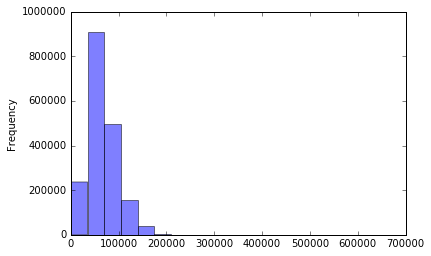

In [23]:
adj_pay_stat.plot.hist(alpha=0.5, bins=20)

## Dynamic Files - years 2007 - 2009

In [24]:
var_name = []
n_unique = []
pct_unique = []
n_miss = []
prnt_tbl_cnts  =[]
max_val = []
min_val = []

df_dyn_categorical=create_stats_categorical_dataframe(dyn_files)


In [25]:
adj_pay_dyn=dyn_files['adjusted_pay']
adj_pay_dyn=adj_pay_dyn.replace('******', np.nan)
adj_pay_dyn=adj_pay_dyn.convert_objects(convert_numeric=True)
#adj_pay.apply(pd.to_numeric)    


C:\Users\drode\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


### Overview

In [26]:
print_overview(dyn_files)


Dataset general info 

Number of variables              15        
Number of observations           1603339   


### Descriptive Statistics 

In [27]:
df_dyn_categorical

,max_val,min_val,n_miss,n_unique,pct_unique,var_name
0,SL,AA,0,17,0.001060,accession_ind
1,374400,******,0,80557,5.024327,adjusted_pay
2,70-74,75+,0,14,0.000873,age
3,ZU00,AB**,0,556,0.034678,agency
4,ZI8000000,#########,0,11000,0.686068,duty_station
5,2009-12-31 00:00:00,2005-04-03 00:00:00,0,1557,0.097110,effective_dt
6,010999621,000000002,0,1128829,70.404886,empid
7,DYN_NDOD,DYN_DOD,0,2,0.000125,file_type
8,SM,**,0,159,0.009917,grade
9,30-34,1-2,0,11,0.000686,los


### Frequncy Tables for Categorical Variables

In [28]:
for i in range(0, len(var_name)):
    
    print (var_name[i])
    
    print_pretty_cnts(prnt_tbl_cnts[i][0],prnt_tbl_cnts[i][1] )
    print ('\n')

accession_ind
AD         |  499919    
AC         |  359257    
SC         |  250942    
SJ         |  173339    
SD         |  139149    
SA         |  68715     
AA         |  42608     
SF         |  14196     
SB         |  11411     
AB         |  10209     
SK         |  9412      
SE         |  9019      
SI         |  6471      
SG         |  4401      
SH         |  2635      
AE         |  1296      
SL         |  360       


adjusted_pay
027504     |  30060     
026569     |  29918     
025797     |  26751     
030772     |  25266     
029726     |  25145     
...        |  ...       
104493     |  1         
104492     |  1         
104490     |  1         
057099     |  1         
104488     |  1         


age
 20-24     |  234896    
 25-29     |  220319    
 30-34     |  167605    
 35-39     |  145652    
 40-44     |  145216    
 45-49     |  143550    
 55-59     |  138061    
 50-54     |  137882    
 15-19     |  110005    
 60-64     |  96211     
 65-69     |  3

### Numeric Variables

####  Variable 'Adjusted Basic Payment'

In [29]:
pretty_descriptive_stats_num(adj_pay_dyn)

Count       1603339   
Missing     4642      
Mean        49077.04  
Median      38117.0   
Std         30953.86  
Min         0.0       
Max         374400.0  
0.05     21517.0
0.10     23667.0
0.25     28195.0
0.75     59979.0
0.90     91123.0
0.95    112995.0
Name: adjusted_pay, dtype: float64


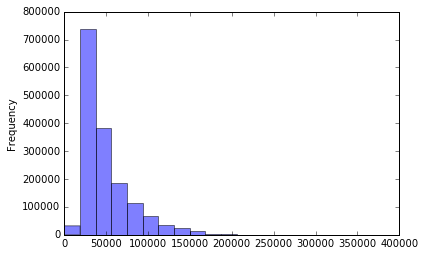

In [30]:
adj_pay_dyn.plot.hist(alpha=0.5, bins=20)

### Join the two dataframes

In [32]:
dfmerged=pd.merge(dyn_files, dfstat_2007_03, on='empid', how='inner')
dfmerged.to_csv('../Output-data/merge_stat032007_dyn2007_2009.csv')



In [33]:
dfmerged.to_csv('../Output-data/merge_stat032007_dyn2007_2009.csv')

In [31]:
#dfplot=dfstat_2007_03[(dfstat_2007_03['adjusted_pay']!='******')]

#plt.figure(figsize=(10,5))
#plt.subplot(1, 1, 1)
#plt.hist(dfplot['adjusted_pay'], bins=20)
#plt.title('Adjusted Basic Pay - all values')
#plt.grid(True)
#plt.show()

#plt.figure(figsize=(10,5))
#plt.subplot(1, 1, 1)
#plt.hist(dfplot, bins=100)
#plt.title('Adjusted Basic Pay - (Salary between 0 - 200,000)')
#plt.axis([0, 200000, 0, 250000])
#plt.grid(True)
#plt.show()

In [ ]:
# Check distribution of data by agency.
# Save dataframe to csv file



In [34]:
dfmerged.shape

(527052, 31)